In [10]:
import csiroct_imbl_asci as cia
import os
import os.path
import logging
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tifffile import imsave

run_on_asci = True

dir_experiment_input_asci = '/user/home/imbl/14774/input/Lung_CTXV/19-2-R2173'
dir_experiment_output_asci = '/user/home/imbl/14774/output/test'

dir_experiment_input_local = '/mnt/csiro/civ/scratch/lung/CTXV/19-2-R2173'
dir_experiment_output_local = '/mnt/Data/CTXV/19-2-R2173'

if run_on_asci:
    dir_experiment_input = dir_experiment_input_asci
    dir_experiment_output = dir_experiment_output_asci
    
    cmdXLICTPreProcSino = '/opt/x-tract/bin/XLIPreProcSinoMPI'
    cmdXLICTWorkflowMPI = '/opt/x-tract/bin/XLICTWorkflowMPI'
    cmdXLICTReconMPI = '/opt/x-tract/bin/XLICTReconMPI'
    cmdXLICOR = None
    
    # Read buffer size (GB) 
    read_buffer_gb = 200
else:
    dir_experiment_input = dir_experiment_input_local
    dir_experiment_output = dir_experiment_output_local
    
    cmdXLICTPreProcSino = '/home/tho78s/development/X-TRACT-trunk/build/linux/XLIPreProcSinoMPI.exe'
    cmdXLICTWorkflowMPI = '/home/tho78s/development/X-TRACT-trunk/build/linux/XLICTWorkflowMPI.exe'
    cmdXLICTReconMPI = '/home/tho78s/development/X-TRACT-trunk/build/linux/XLICTReconMPI.exe'
    cmdXLICOR = '/home/tho78s/development/X-TRACT-trunk/build/linux/XLICOR.exe'   
    
    # Read buffer size (GB)
    read_buffer_gb = 20
    
# Create the output folder if it doesn't already exist
if not os.path.exists( dir_experiment_output ):
    os.mkdir( dir_experiment_output )
    
# construct filenames
epics_flat_h5 = os.path.join( dir_experiment_input, 'BG_BEFORE.hdf' )
epics_dark_h5 = os.path.join( dir_experiment_input, 'DF_BEFORE.hdf' )
epics_sample_h5 = os.path.join( dir_experiment_input, 'SAMPLE.hdf' )

# File prefix for converted files, a numerical suffix will be attached for each sample file
xtract_input_converted_prefix_h5 = os.path.join( dir_experiment_output, '19-2-R2202-Lung_' )

# The first converted XV dataset
xtract_input_converted_00_h5 = os.path.join( dir_experiment_output, '19-2-R2202-Lung_00.h5' )

xtract_output_ctworkflow_h5 = os.path.join( dir_experiment_output, 'test_xv_x-tract_ctworkflow.h5' ) 
xtract_output_preproc_h5 = os.path.join( dir_experiment_output, 'test__xv_x-tract_preproc.h5' )

# Define the number of time points
time_points = 15

In [11]:
# Convert input EPICS XV HDF5 files (if required)

import logging

logging.basicConfig(level=logging.DEBUG)

# Convert to X-TRACT compatible HDF5 using the same EPICS
# test file for flats, darks and samples
num_files = cia.convert_xv_to_xtract_hdf5(
        epics_flat_h5,
        epics_dark_h5,
        epics_sample_h5,
        xtract_input_converted_prefix_h5,
        time_points=time_points,
        read_buffer_gb=read_buffer_gb)

print( 'Number of created sample files =', num_files )

DEBUG:root:convert_xv_to_xtract_hdf5, time_points = 15
DEBUG:root:Opened flat - /user/home/imbl/14774/input/Lung_CTXV/19-2-R2173/BG_BEFORE.hdf
DEBUG:root:Read flat dataset
DEBUG:root:Opened dark - /user/home/imbl/14774/input/Lung_CTXV/19-2-R2173/DF_BEFORE.hdf
DEBUG:root:Read dark dataset
DEBUG:root:Opened sample - /user/home/imbl/14774/input/Lung_CTXV/19-2-R2173/SAMPLE.hdf
DEBUG:root:Truncating projections from 12133 to 12120
DEBUG:root:Number of partitions: 1
DEBUG:root:Created file - /user/home/imbl/14774/output/test/19-2-R2202-Lung_00.h5
DEBUG:root:Created dataset - exchange/data_flat
DEBUG:root:Created dataset - exchange/data_dark
DEBUG:root:Created file - /user/home/imbl/14774/output/test/19-2-R2202-Lung_01.h5
DEBUG:root:Created dataset - exchange/data_flat
DEBUG:root:Created dataset - exchange/data_dark
DEBUG:root:Created file - /user/home/imbl/14774/output/test/19-2-R2202-Lung_02.h5
DEBUG:root:Created dataset - exchange/data_flat
DEBUG:root:Created dataset - exchange/data_dark
D

Number of created sample files = 15


projection dataset shape:  (808, 2160, 2560)


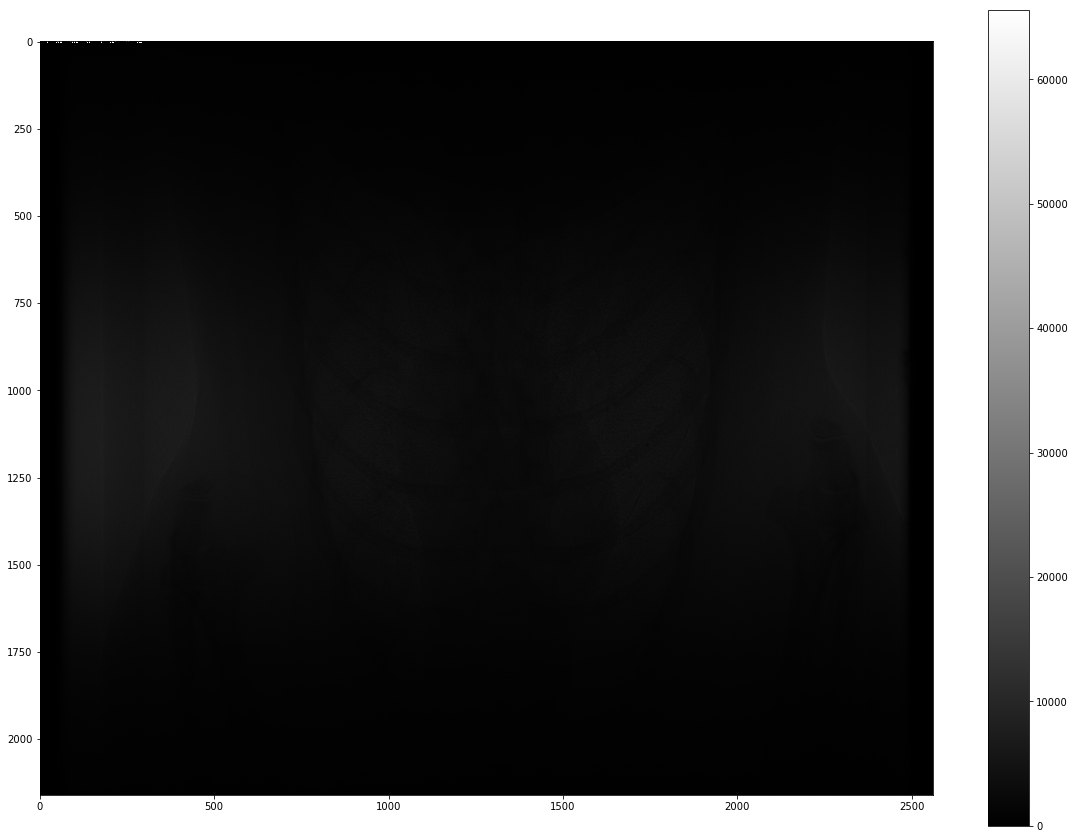

In [12]:
# Display the first converted projection from the first XV dataset
proj_idx=800
with h5py.File(xtract_input_converted_00_h5, 'r') as f: 
    print('projection dataset shape: ', f['exchange/data'].shape)
    fig, ax = plt.subplots(figsize=(20, 15))
    fig.colorbar( ax.imshow(f['exchange/data'][proj_idx] , cmap='gray'), ax=ax)  
    plt.show()
    imsave('/user/home/imbl/14774/output/test/proj_test.tif',f['exchange/data'][proj_idx])